<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm 

### Authors: Kavya Angara (ka32577), Pratik Gawli (pbg397)

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 

(a)

A point estimator is a statistic used to estimate the value of an unknown parameter of a population. It uses sample data when calculating a single statistic that will be the best estimate of the unknown parameter of the population.
The bias of a point estimator is defined as the difference between the expected value of the estimator and the value of the parameter being estimated. When the estimated value of the parameter and the value of the parameter being estimated are equal, the estimator is considered unbiased.

Whereas Model Bias describes how well a model matches the training set. A model with high bias won't match the data set closely, while a model with low bias will match the data set very closely. Model bias may lead an algorithm to miss the relevant relationship between data inputs (features) and targeted outputs (predictions). In essence, bias arises when an algorithm has insufficient capability in learning the appropriate signal from the dataset. It denotes the systematic and repeatable error in a Risk Model that creates outcomes that are statistically at odds with the system, population or behavior that is being modeled.


(b) 

In the learning curve, if the Training MSE is way lower than Validation MSE for a given training set, then we can say that the model is overfitting. This happens when we are using few data points for a given complex model. The model will fit perfectly on training data, reducing training MSE close to 0 but will perform very poorly on test data set; leading to a higher MSE. Thus, if we look at the Learning curve at point A, where training data size is lesser comparitively, the model tends to overfit the data, leading to test MSE being much higher than the training MSE. (High Variance)

As we increase the train set size, we see that even though a given model performs slightly poorly on the training dataset, Test MSE reduces greatly, indicating that this model has a better performance than the first one - which indicates improvement from overfitting.

Now, as we increase the train set size, and the train and test curve meet a a comparitively higher value of MSE, it could be inferred that the model is underfitting the data - meaning both High train and crossvalidation errors for a given sample size. This obtained error is much worse than the desired performance.

It is important to know that such an effect of high MSE on train and test data sets can be encountered at a smaller training set size as well i.e. these curves can coverge at a very small training set size as well. In both cases, this implies that after a particular point B, increasing the data size does not affect the train and validation MSE as the model is not able to learn from any additional data.(High Bias).




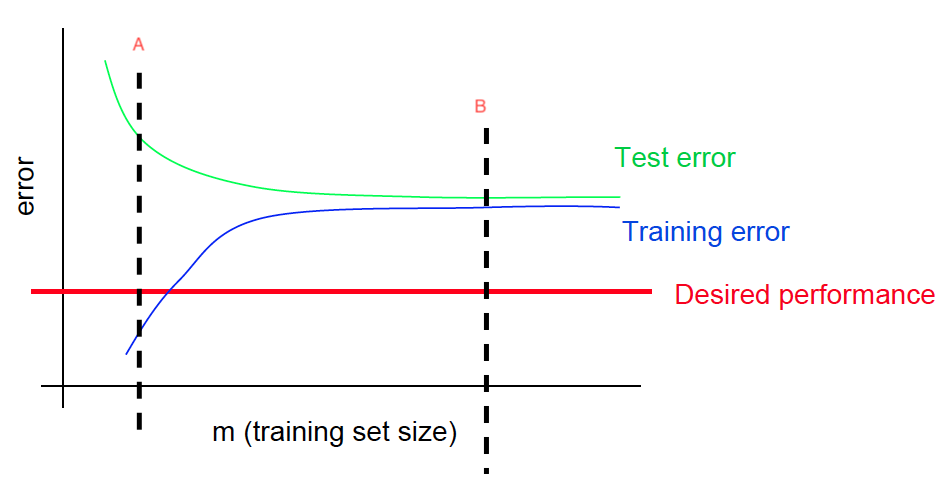

In [1]:
from IPython.display import Image
Image("Qn2.PNG", width=1000, height=800)

# Question 2: Bias-Variance Exploration (20 pts)
#### We want to build a model that can predict y for unknown inputs x.

#### (a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.



In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data_load = np.load('./data.npy', allow_pickle = True)

In [4]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [5]:
def plot_curves(x_train, y_train, x_test, y_test):
    #creating a list of polynomial degrees
    poly_list=[2,4,7]
    #creating dictionaries to stroes values for each polynomial
    train_pred_dict = {}
    test_pred_dict = {}
    all_pred_dict = {}
    train_MSE_list = []
    test_MSE_list = []
    order = np.argsort(x_train)
    x_train = np.array(x_train)[order]
    y_train = np.array(y_train)[order]

    order = np.argsort(x_test)
    x_test = np.array(x_test)[order]
    y_test = np.array(y_test)[order]
    for poly in poly_list:
        #squeeze the data
        x_train_p=np.vander(np.squeeze(x_train), poly+1)
        x_test_p=np.vander(np.squeeze(x_test), poly+1)
        x_all_p=np.vander(np.squeeze(x_all), poly+1)

        #fit the model
        lrp.fit(x_train_p,y_train)

        # Make predictions
        y_train_pred = lrp.predict(x_train_p)
        y_test_pred = lrp.predict(x_test_p)
        y_all_pred = lrp.predict(x_all_p)
        train_pred_dict[poly] = y_train_pred
        test_pred_dict[poly] = y_test_pred
        all_pred_dict[poly] = y_all_pred

        #print and store MSEs
        train_MSE_list.append(mean_squared_error(y_train, y_train_pred))
        test_MSE_list.append(mean_squared_error(y_test,y_test_pred))
        print("MSE for train for ",poly," degree Polynomial",mean_squared_error(y_train, y_train_pred))
        print("MSE for test for ",poly," degree Polynomial",mean_squared_error(y_test,y_test_pred))
        print('\n')


    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1,sharex = True,figsize=(40, 30))

    # Plot outputs for training
    ax1.plot(x_train, y_train, color = "black", linestyle = '--')
    ax1.plot(x_test, y_test, color = "blue", linestyle = '--')
    ax1.legend(['y_train','y_test'], fontsize = 20)
    ax1.set_ylabel("y_train ,y_test", fontsize = 20)
    ax1.set_xlabel("x_train,x_test", fontsize = 20)
    ax1.set_title("y_train vs x_train and y_test vs x_test", fontsize = 20)
    ax1.xaxis.set_tick_params(labelbottom=True)

    # Plot outputs for x_all
    ax2.plot(x_all,all_pred_dict[2], color = "blue", linestyle = '--')
    ax2.plot(x_all,all_pred_dict[4], color = "green", linestyle = '--')
    ax2.plot(x_all,all_pred_dict[7], color = "red", linestyle = '--')
    ax2.legend(['2nd degree polynomial predicted for x_all', '4th degree polynomial predicted for x_all',\
                    '7th degree polynomial predicted for x_all'], fontsize = 20)
    ax2.set_xlabel("x_all", fontsize = 20)
    ax2.set_ylabel("predicted y", fontsize = 20)
    ax2.set_title("x_all vs predicted y for poly 2,4,7", fontsize = 20)
    ax2.xaxis.set_tick_params(labelbottom=True)

    # Plot outputs for testing
    ax3.scatter(x_test, y_test, color = "black")
    ax3.plot(x_test,test_pred_dict[2], color = "blue", linestyle = '--')
    ax3.plot(x_test,test_pred_dict[4], color = "green", linestyle = '--')
    ax3.plot(x_test,test_pred_dict[7], color = "red", linestyle = '--')
    ax3.legend(['Actual y_test','2nd degree polynomial predicted y_test', '4th degree polynomial predicted y_test',\
                    '7th degree polynomial predicted y_test'], fontsize = 20)
    ax3.set_ylabel("y_test , predicted y_test", fontsize = 20)
    ax3.set_xlabel("x_test", fontsize = 20)
    ax3.set_title("x_test vs [y_test , predicted y_test for poly 2,4,7]", fontsize = 20)
    ax3.xaxis.set_tick_params(labelbottom=True)

    plt.show()
    
    return train_MSE_list, test_MSE_list

MSE for train for  2  degree Polynomial 247.29679797371526
MSE for test for  2  degree Polynomial 320.06408346977855


MSE for train for  4  degree Polynomial 31.72001805729006
MSE for test for  4  degree Polynomial 31.29208288660671


MSE for train for  7  degree Polynomial 30.677193592109724
MSE for test for  7  degree Polynomial 33.41069407769011




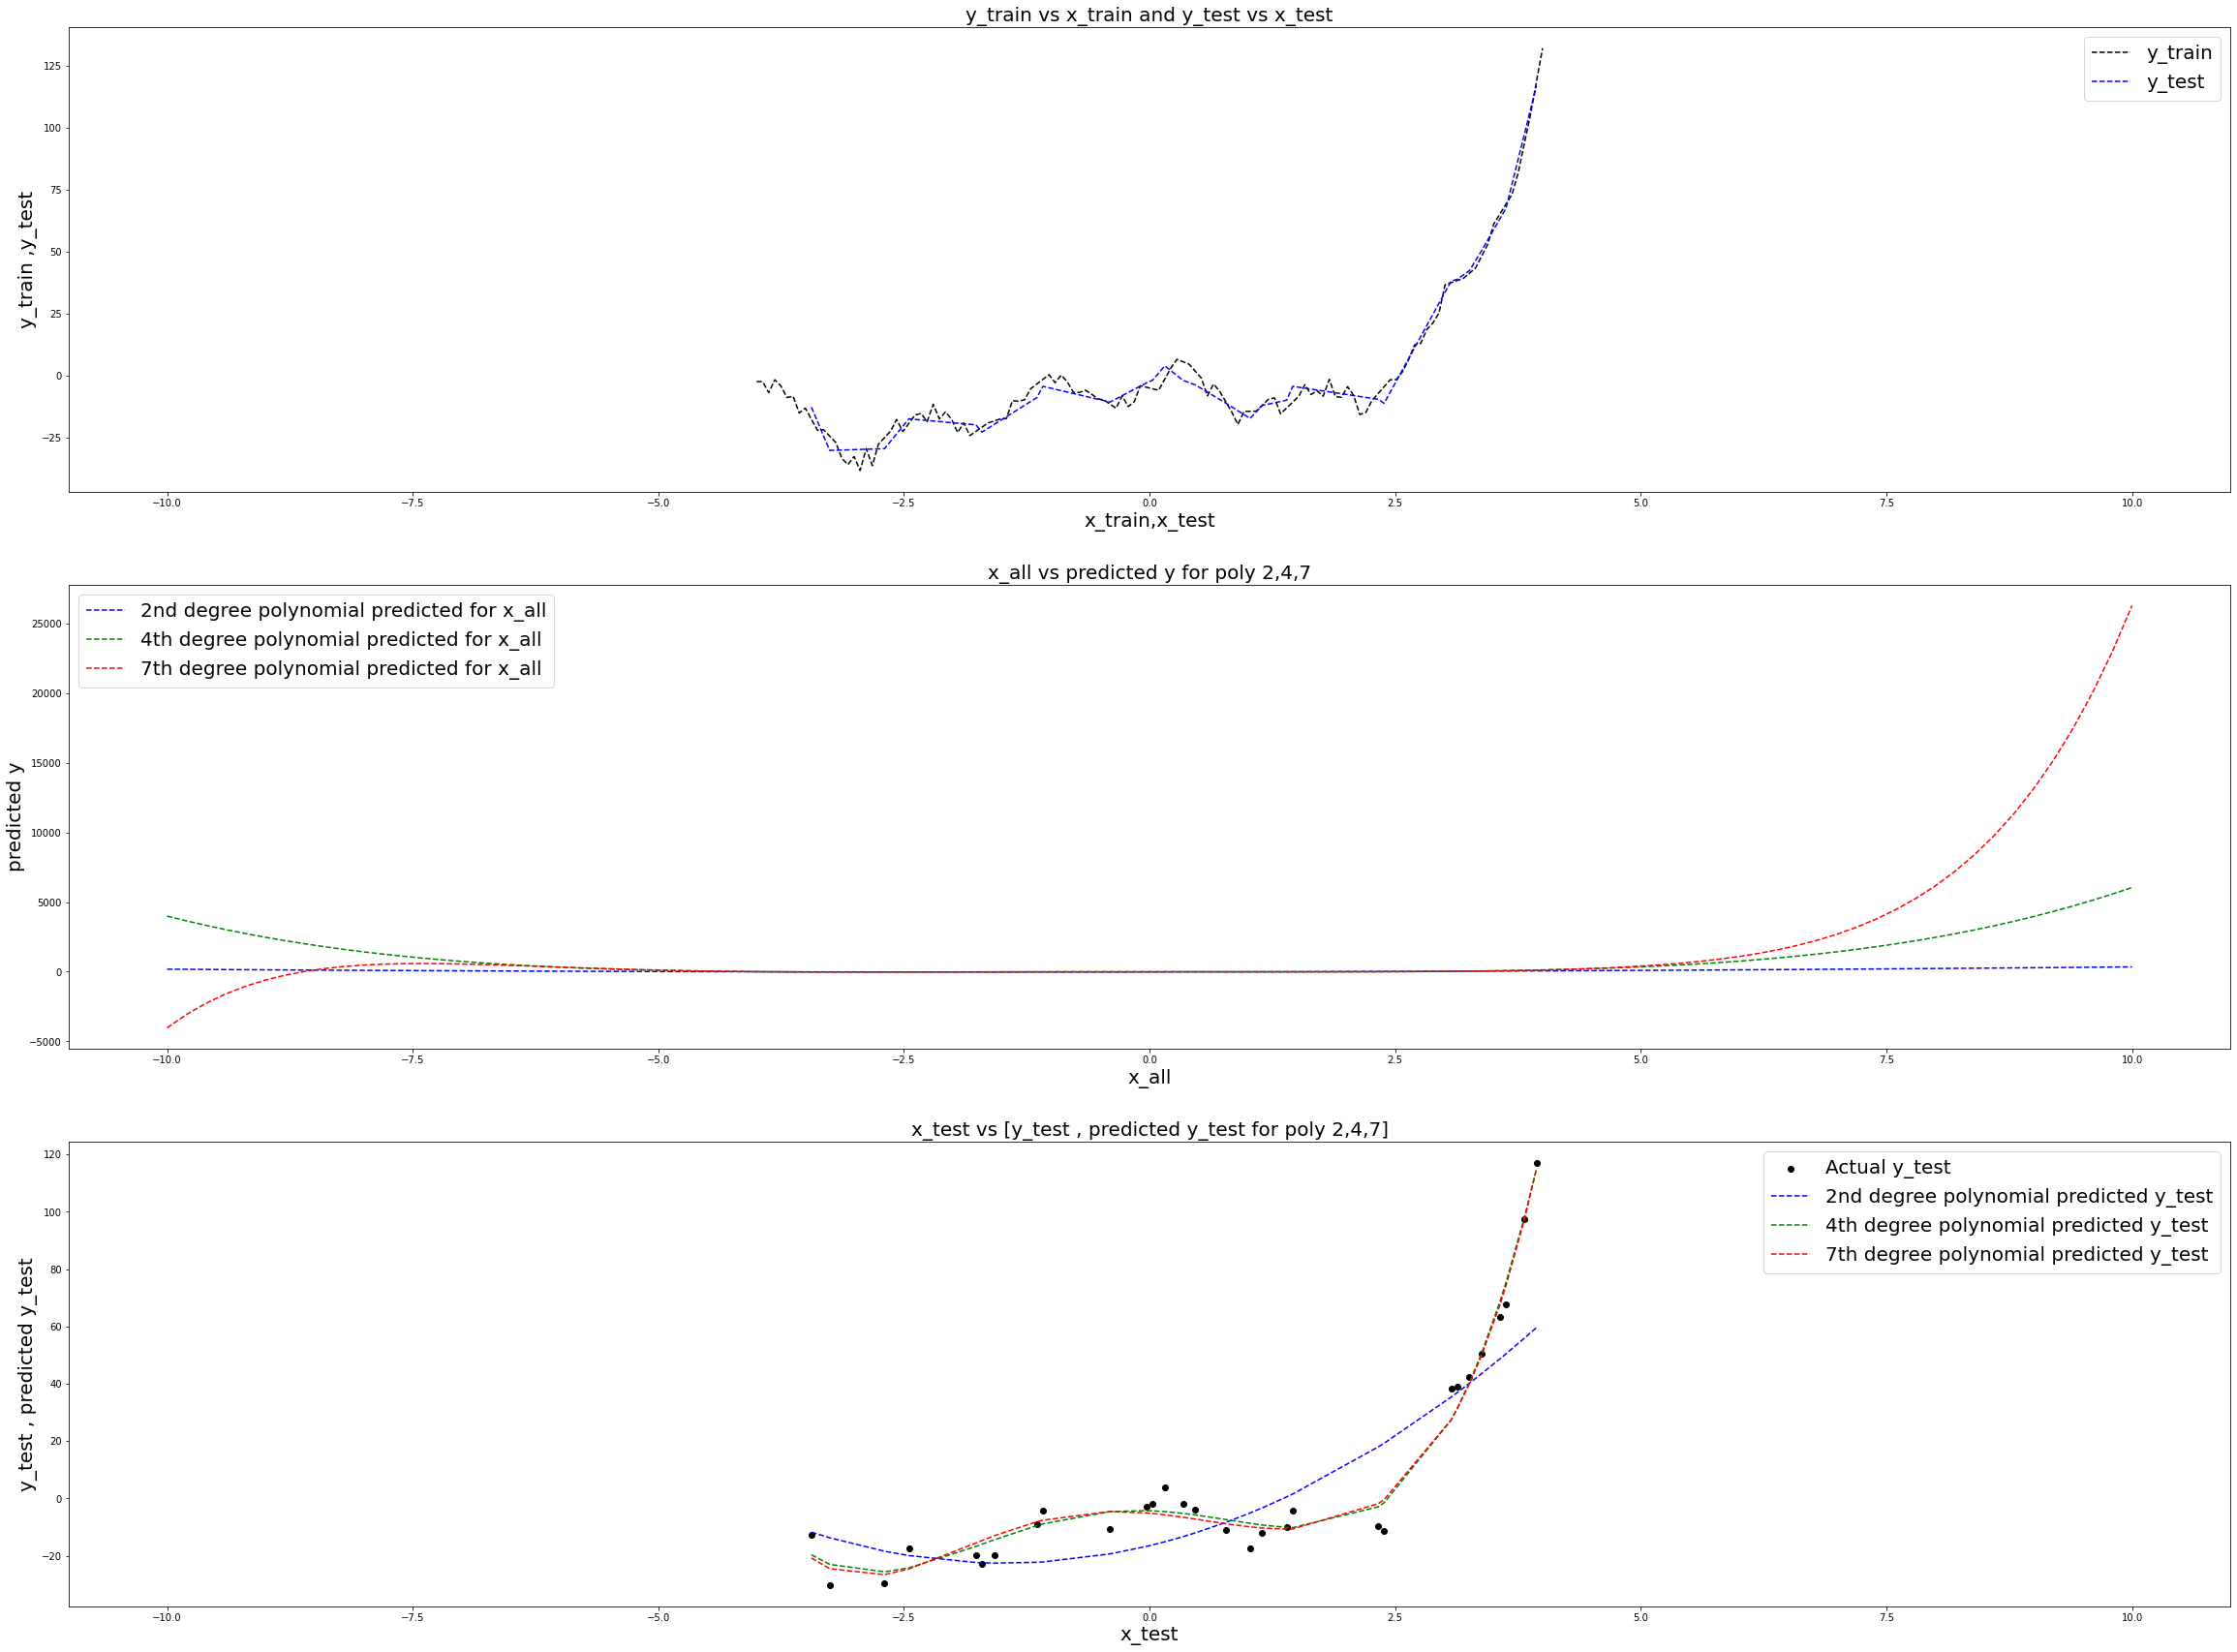

In [6]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

#### (b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.


From the above graphs, we can say that **4th degree polynomial** give the best performance. 
7th degree polynomial is also quite accurate but 4th degree polynomial's MSE is lower than that of 7th degree polynomial.

2nd degree polynomial yields high test and train MSE, this is because of high bias in that model and we know that a model with high bias won't match the data set closely, while a model with low bias will match the data set very closely. Therefore, we can say that 4th degree polynomial and 7th degree polynomial have low bias.

Model with high variance performs very well on training data but has high error rates on test data.
For 2nd degree polynomial, we see that MSE for test data set has higher MSE compared to train data set. We can safeky say that 2nd degree polynomial model has high variance. For 4th and 7th degree polynomial model, we can say the models has low variance and test and train MSE are similar and among 4th and 7th degree polynomial model, 4th degree polynomial model has lowest variance


#### (c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

20% data
MSE for train for  2  degree Polynomial 161.17147378830037
MSE for test for  2  degree Polynomial 402.3231269099294


MSE for train for  4  degree Polynomial 35.11511313912979
MSE for test for  4  degree Polynomial 38.340744983442896


MSE for train for  7  degree Polynomial 22.543946691373304
MSE for test for  7  degree Polynomial 135.20764526756543




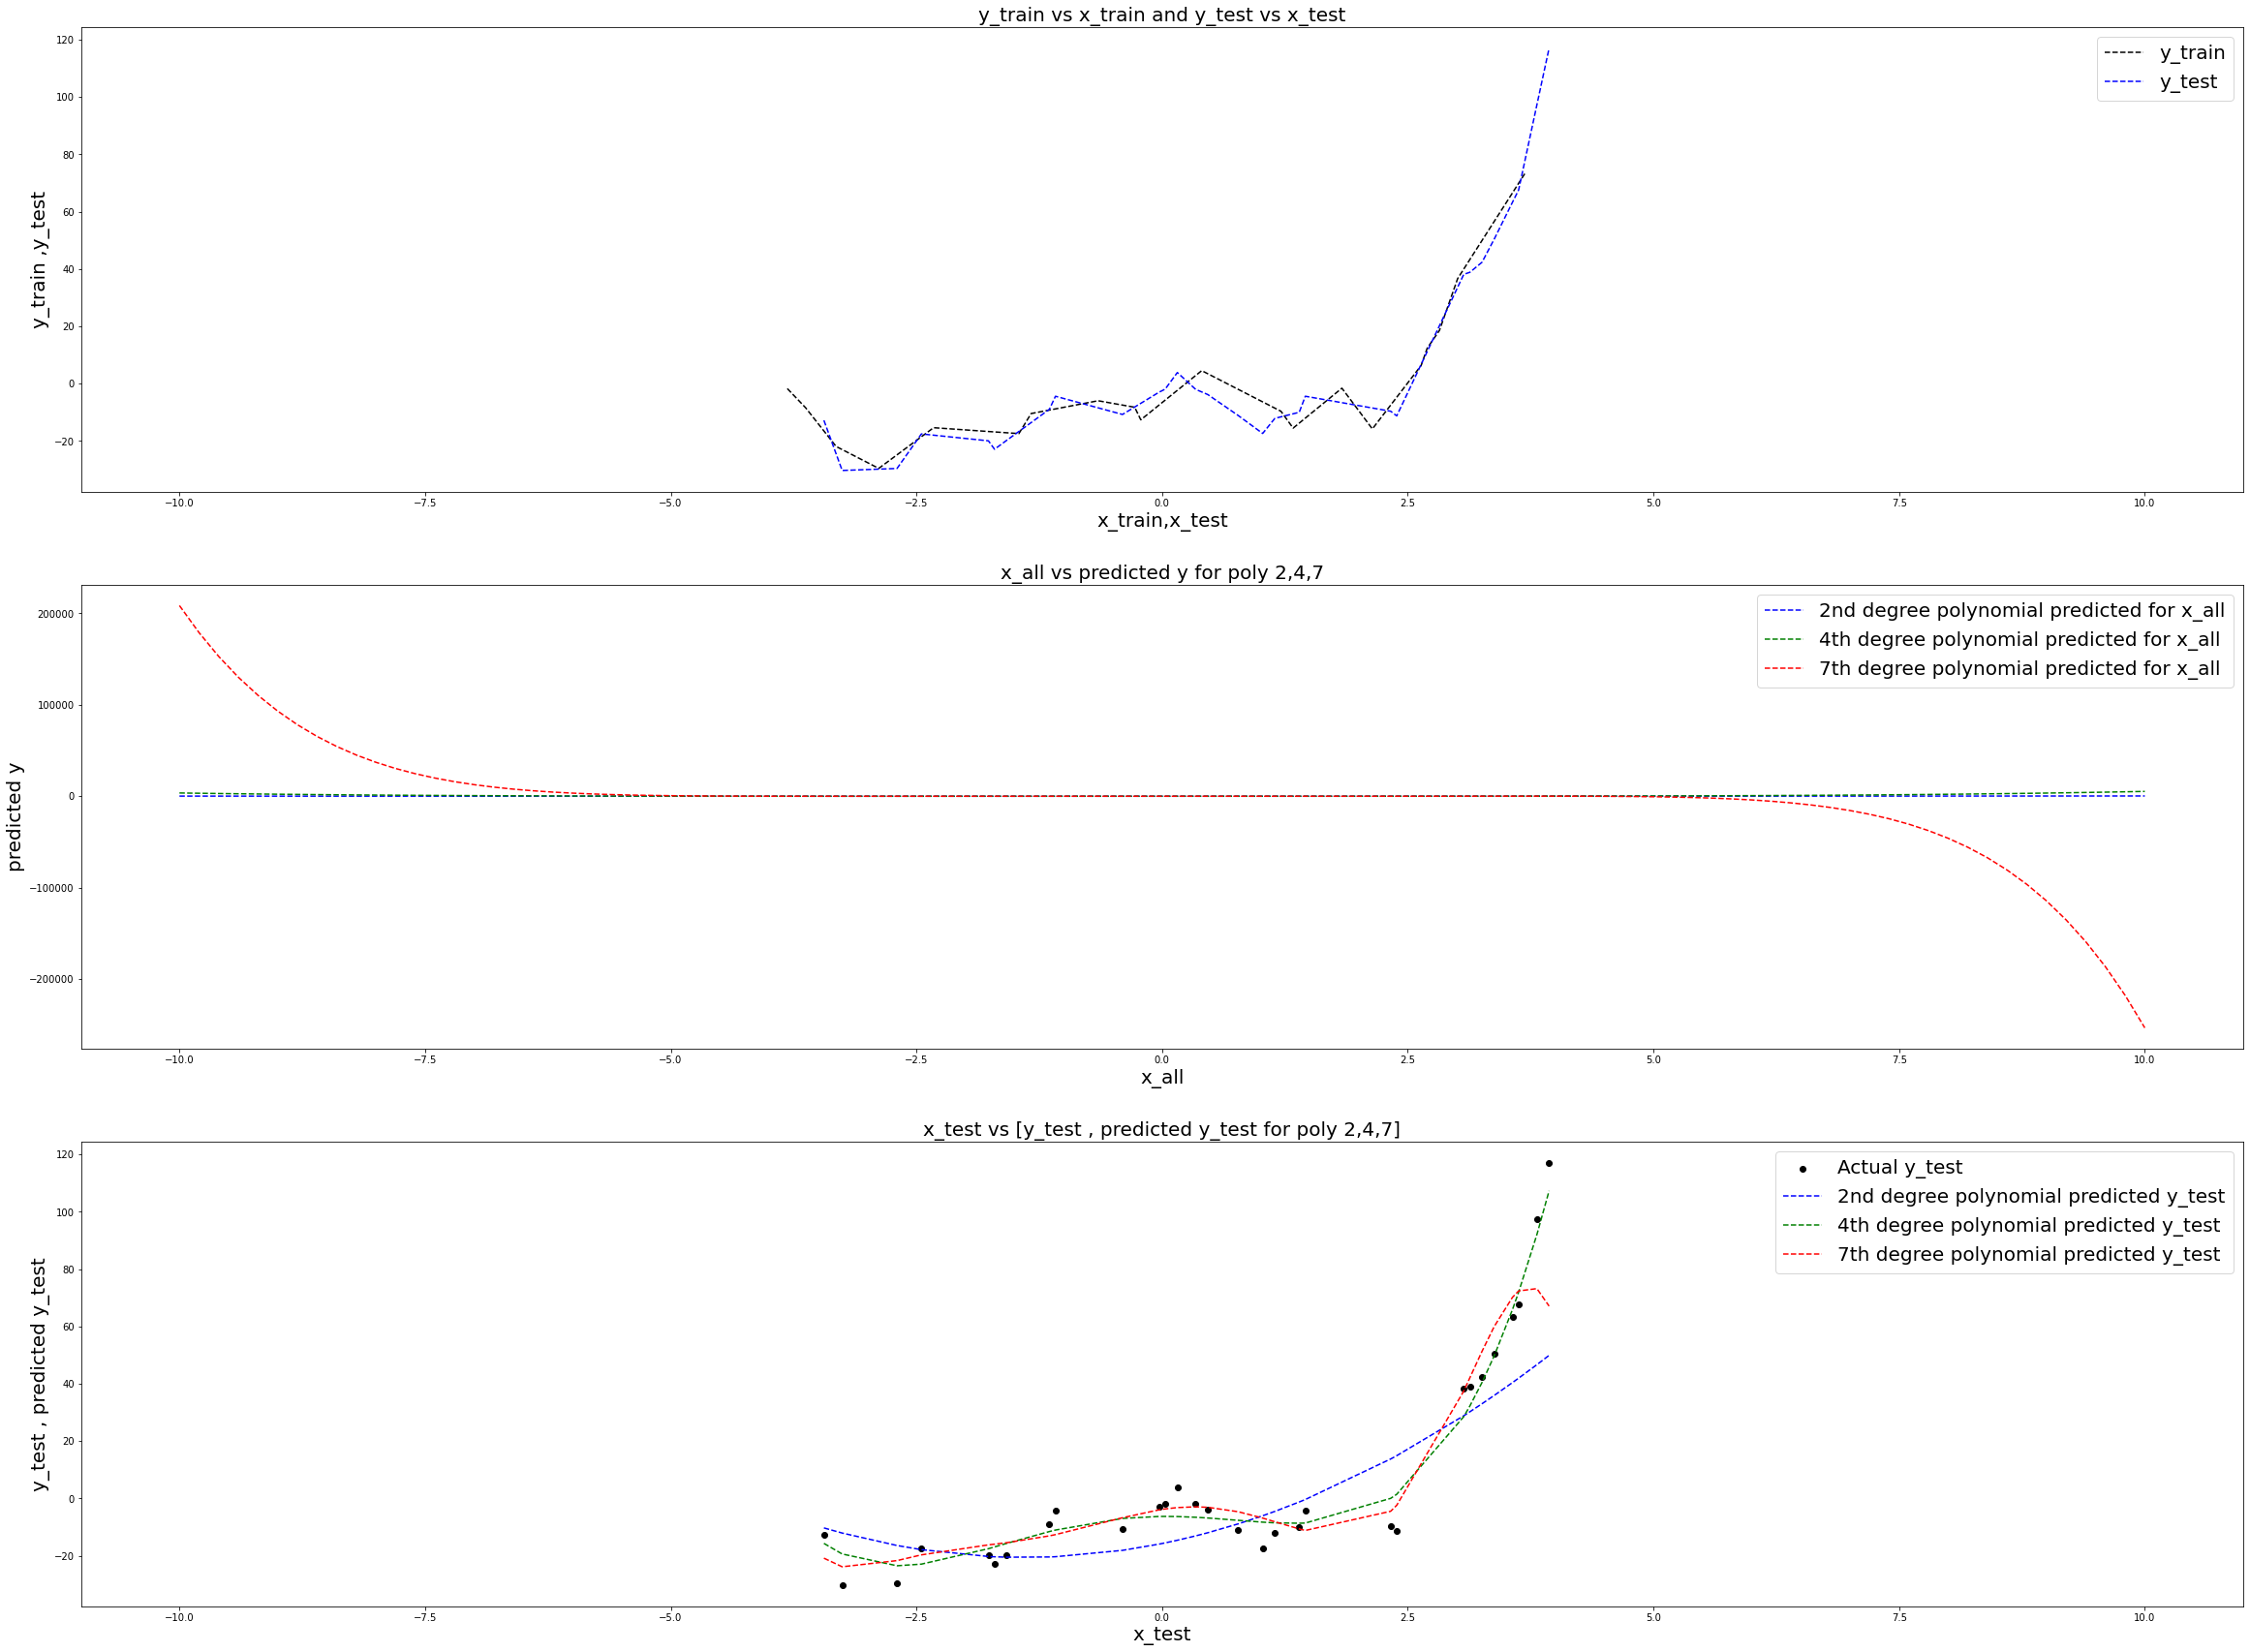

40% data
MSE for train for  2  degree Polynomial 150.33251286085707
MSE for test for  2  degree Polynomial 405.80516696165745


MSE for train for  4  degree Polynomial 31.6245296464469
MSE for test for  4  degree Polynomial 33.16428295918741


MSE for train for  7  degree Polynomial 25.49271875165362
MSE for test for  7  degree Polynomial 61.23741884551068




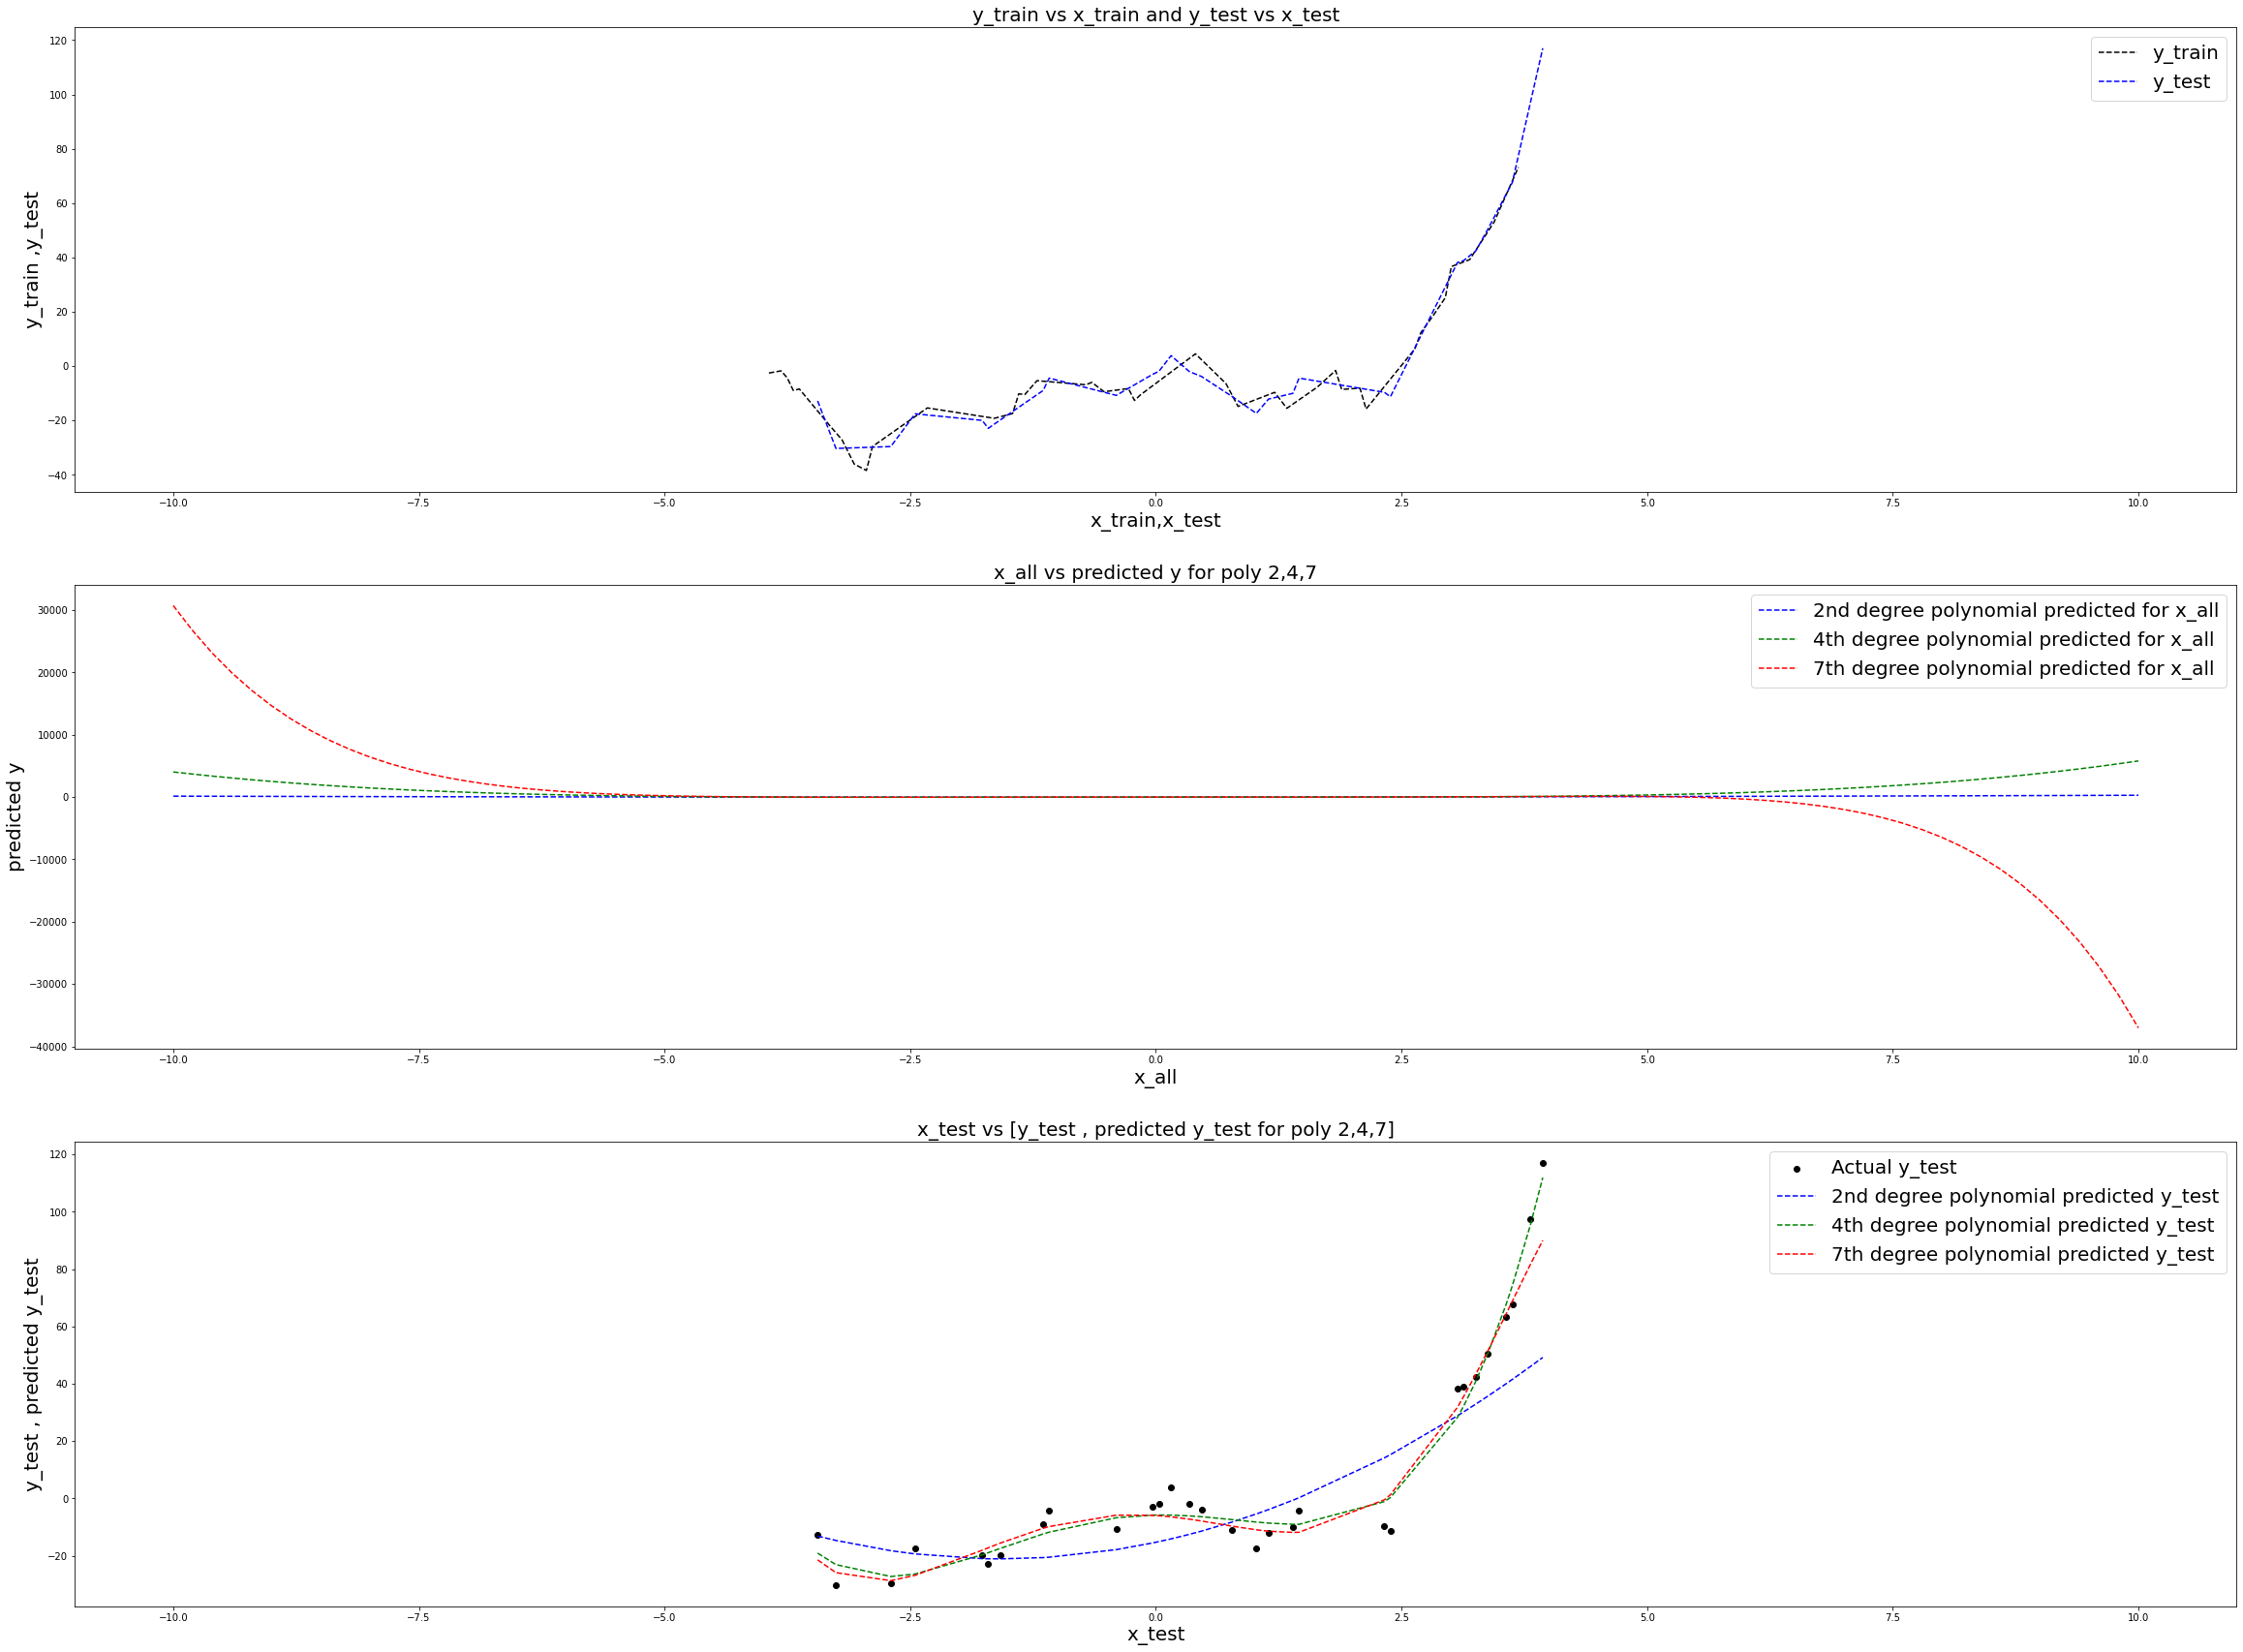

60% data
MSE for train for  2  degree Polynomial 150.0838375914173
MSE for test for  2  degree Polynomial 403.25137848334055


MSE for train for  4  degree Polynomial 29.1928057399479
MSE for test for  4  degree Polynomial 31.781415416196694


MSE for train for  7  degree Polynomial 26.099088642454415
MSE for test for  7  degree Polynomial 60.16667237664516




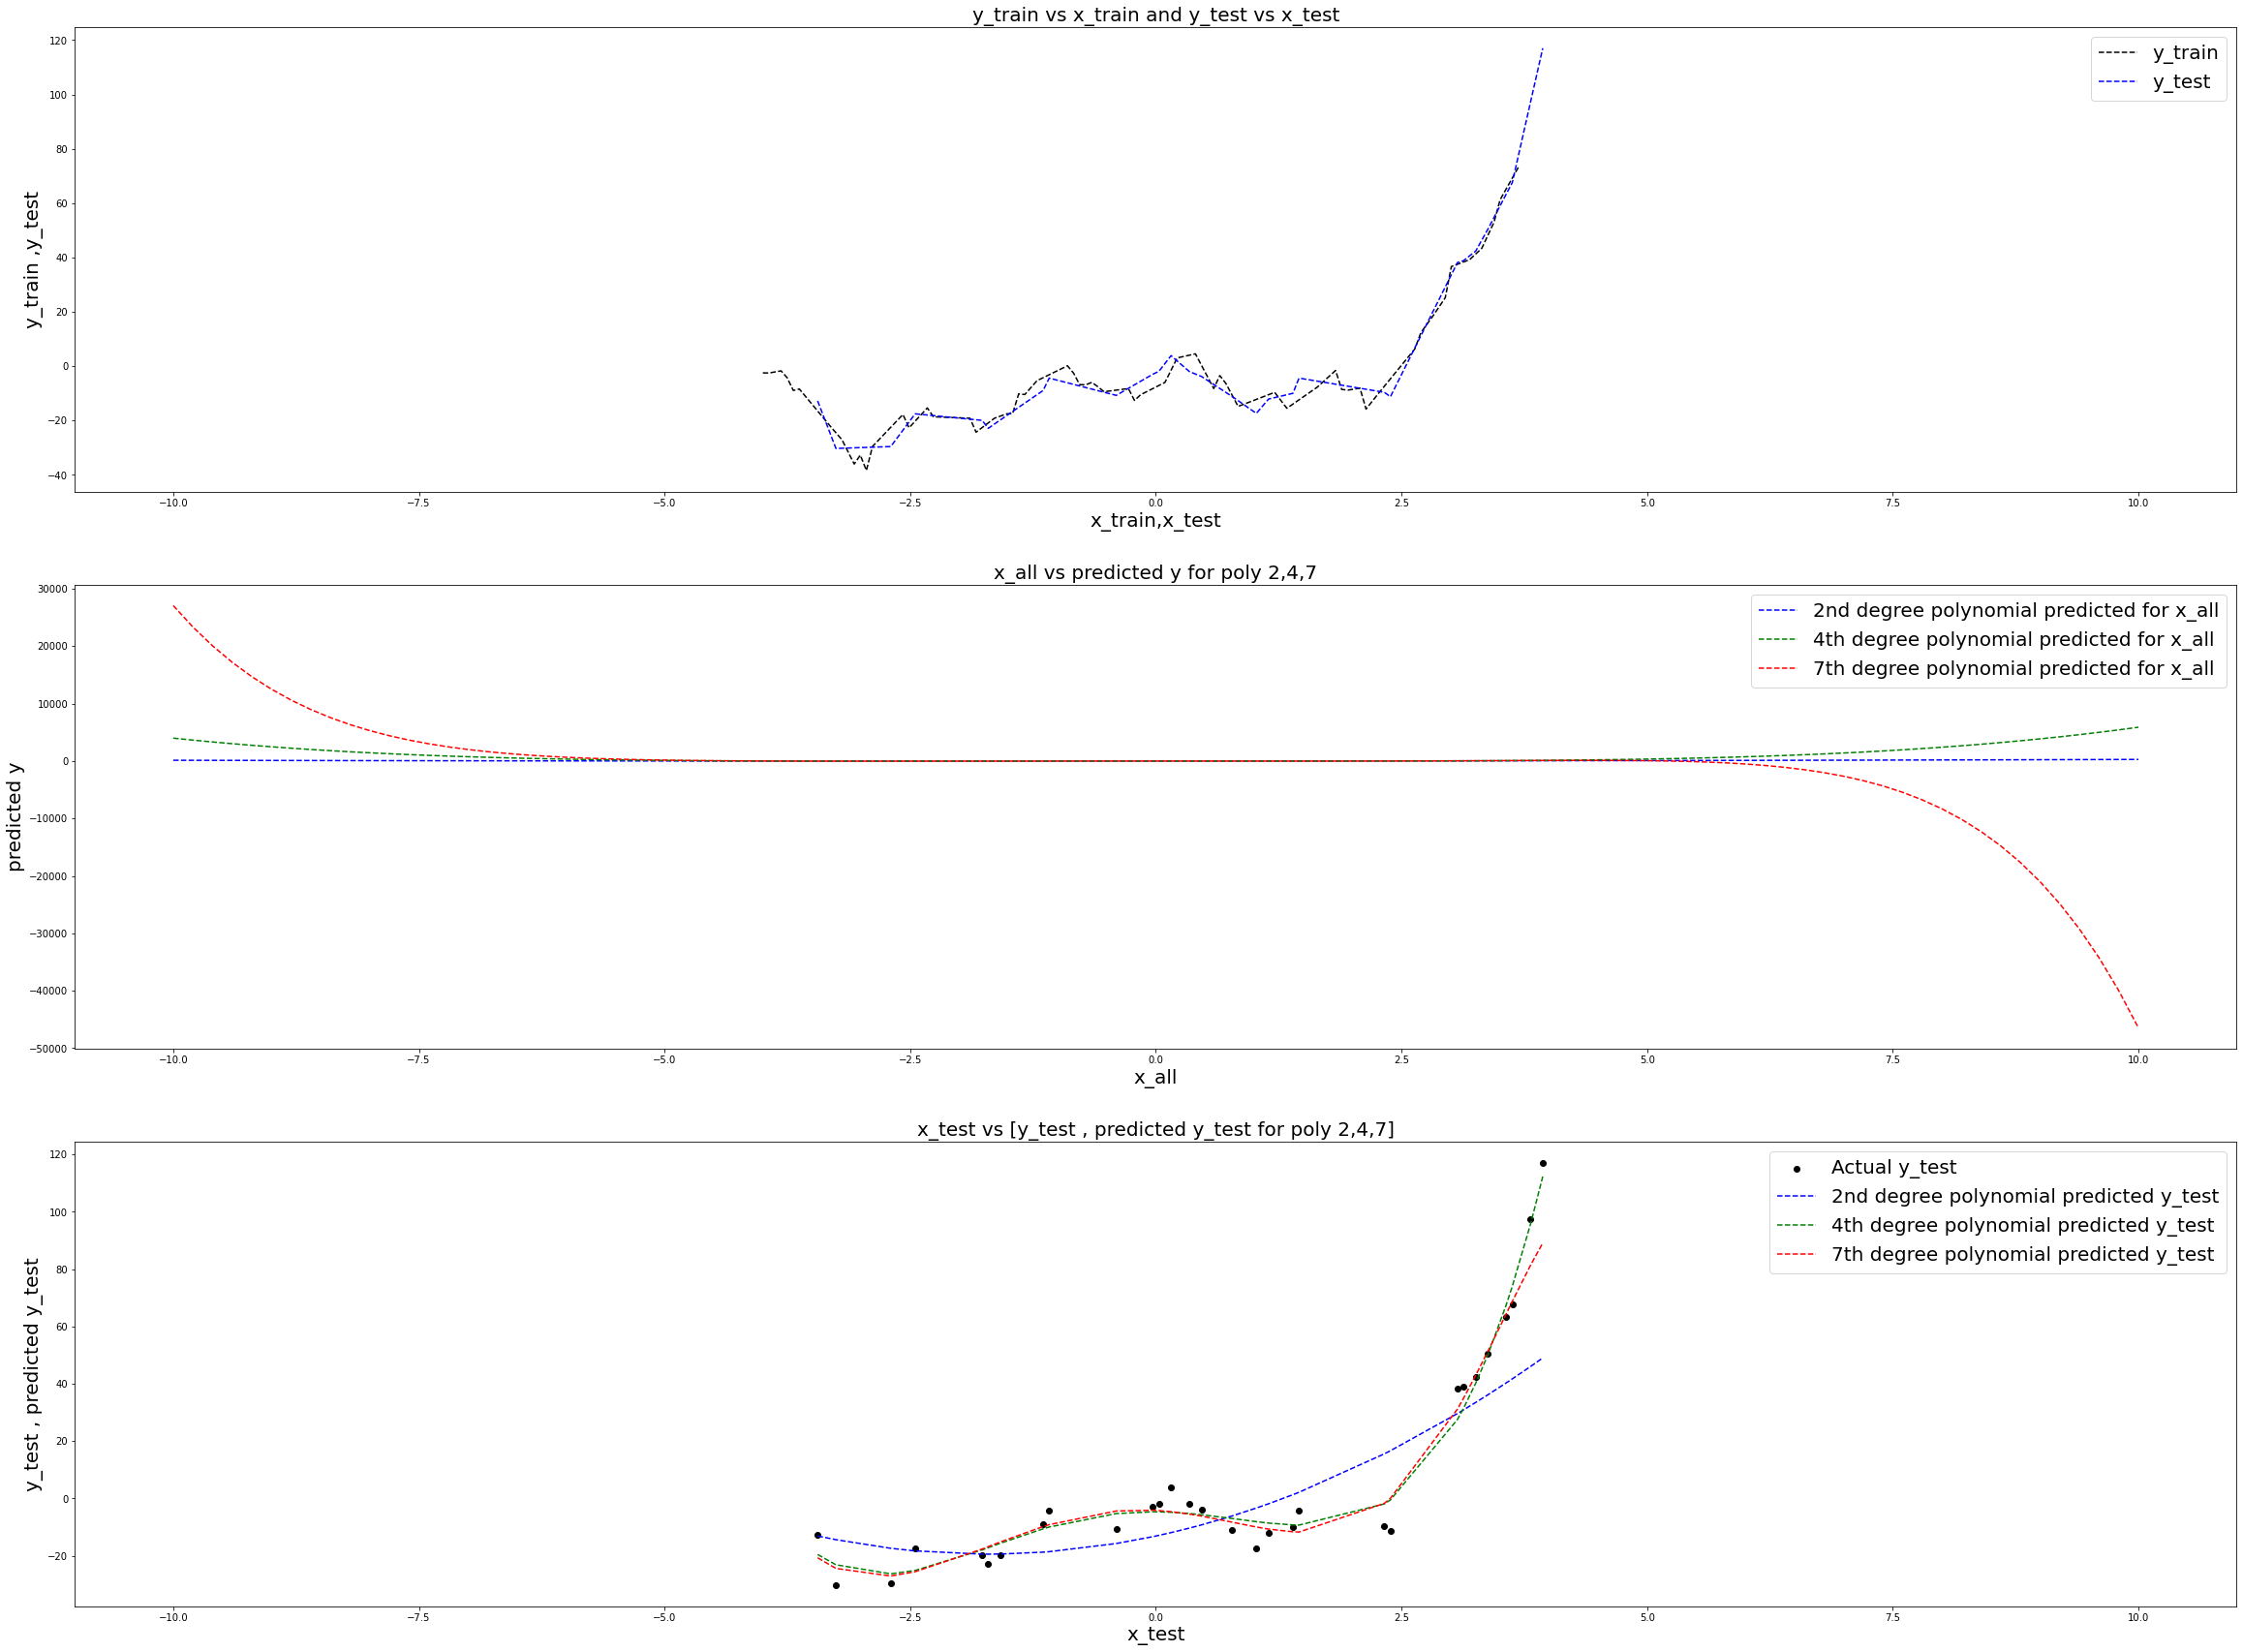

80% data
MSE for train for  2  degree Polynomial 168.11882461502813
MSE for test for  2  degree Polynomial 407.5936968818473


MSE for train for  4  degree Polynomial 29.305108483323444
MSE for test for  4  degree Polynomial 32.51810686874258


MSE for train for  7  degree Polynomial 26.549129596283628
MSE for test for  7  degree Polynomial 48.076935297106374




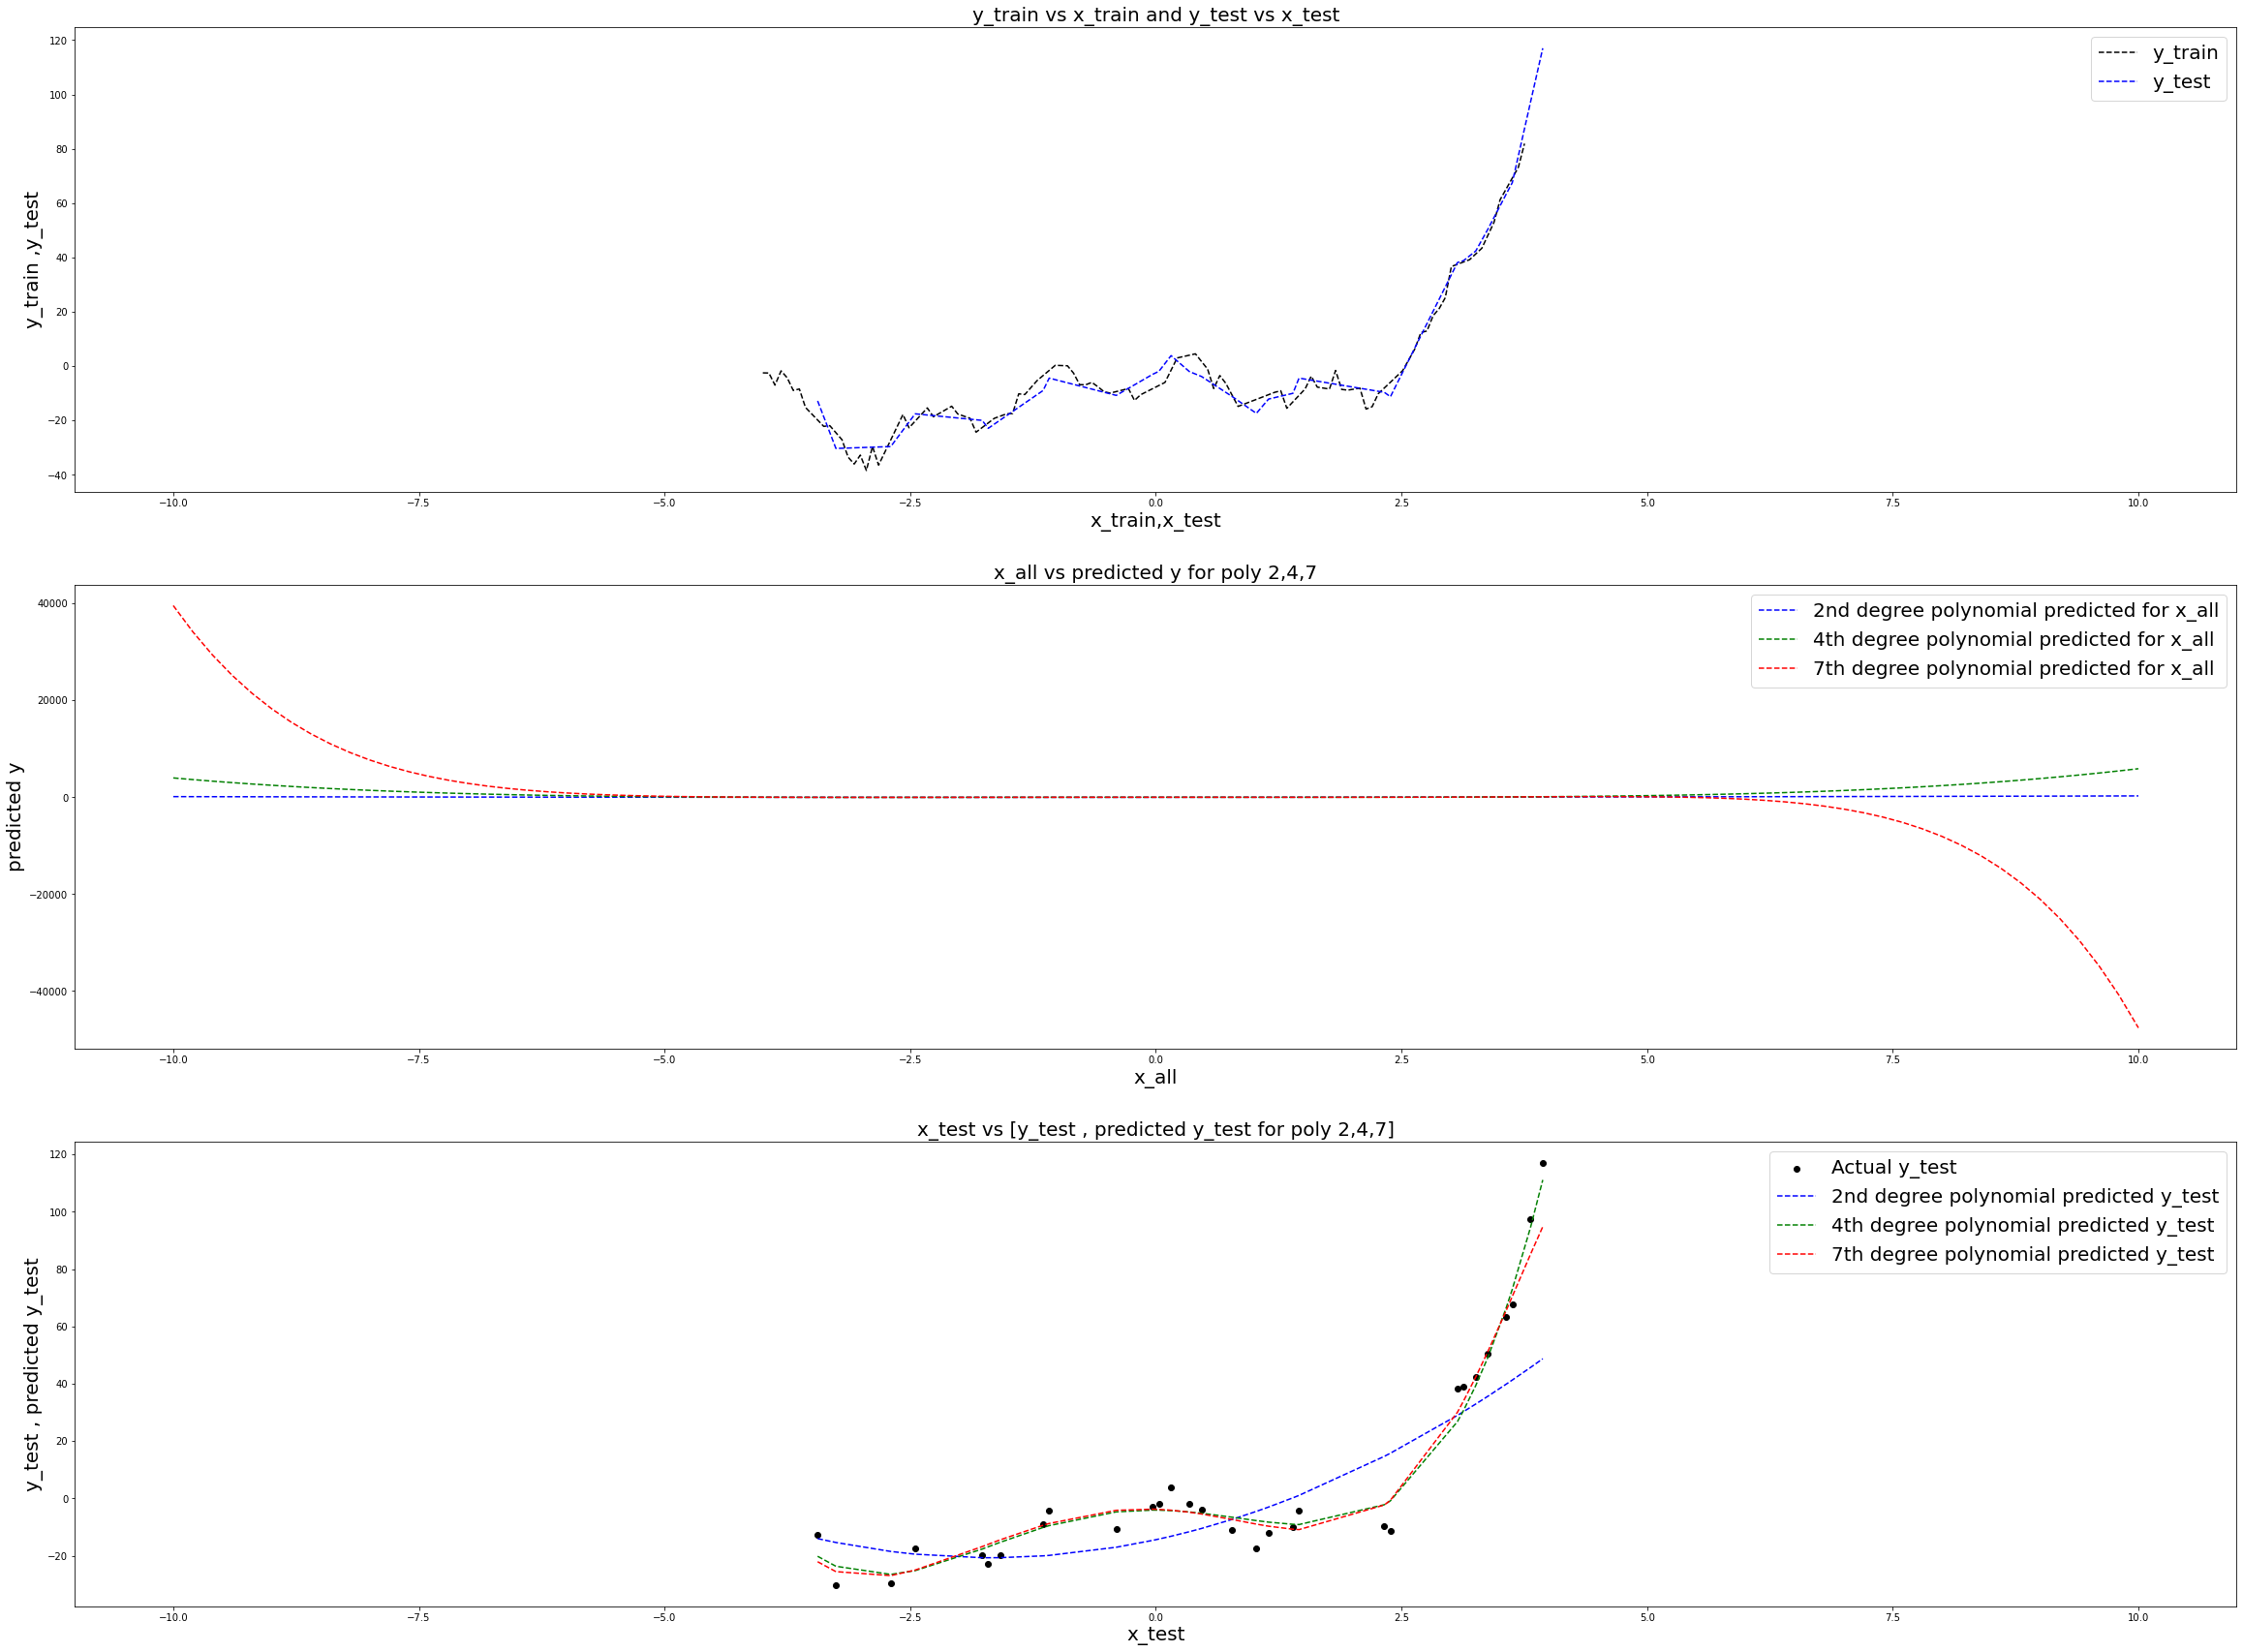

100% data
MSE for train for  2  degree Polynomial 247.29679797371526
MSE for test for  2  degree Polynomial 320.06408346977855


MSE for train for  4  degree Polynomial 31.72001805729006
MSE for test for  4  degree Polynomial 31.29208288660671


MSE for train for  7  degree Polynomial 30.677193592109724
MSE for test for  7  degree Polynomial 33.41069407769011




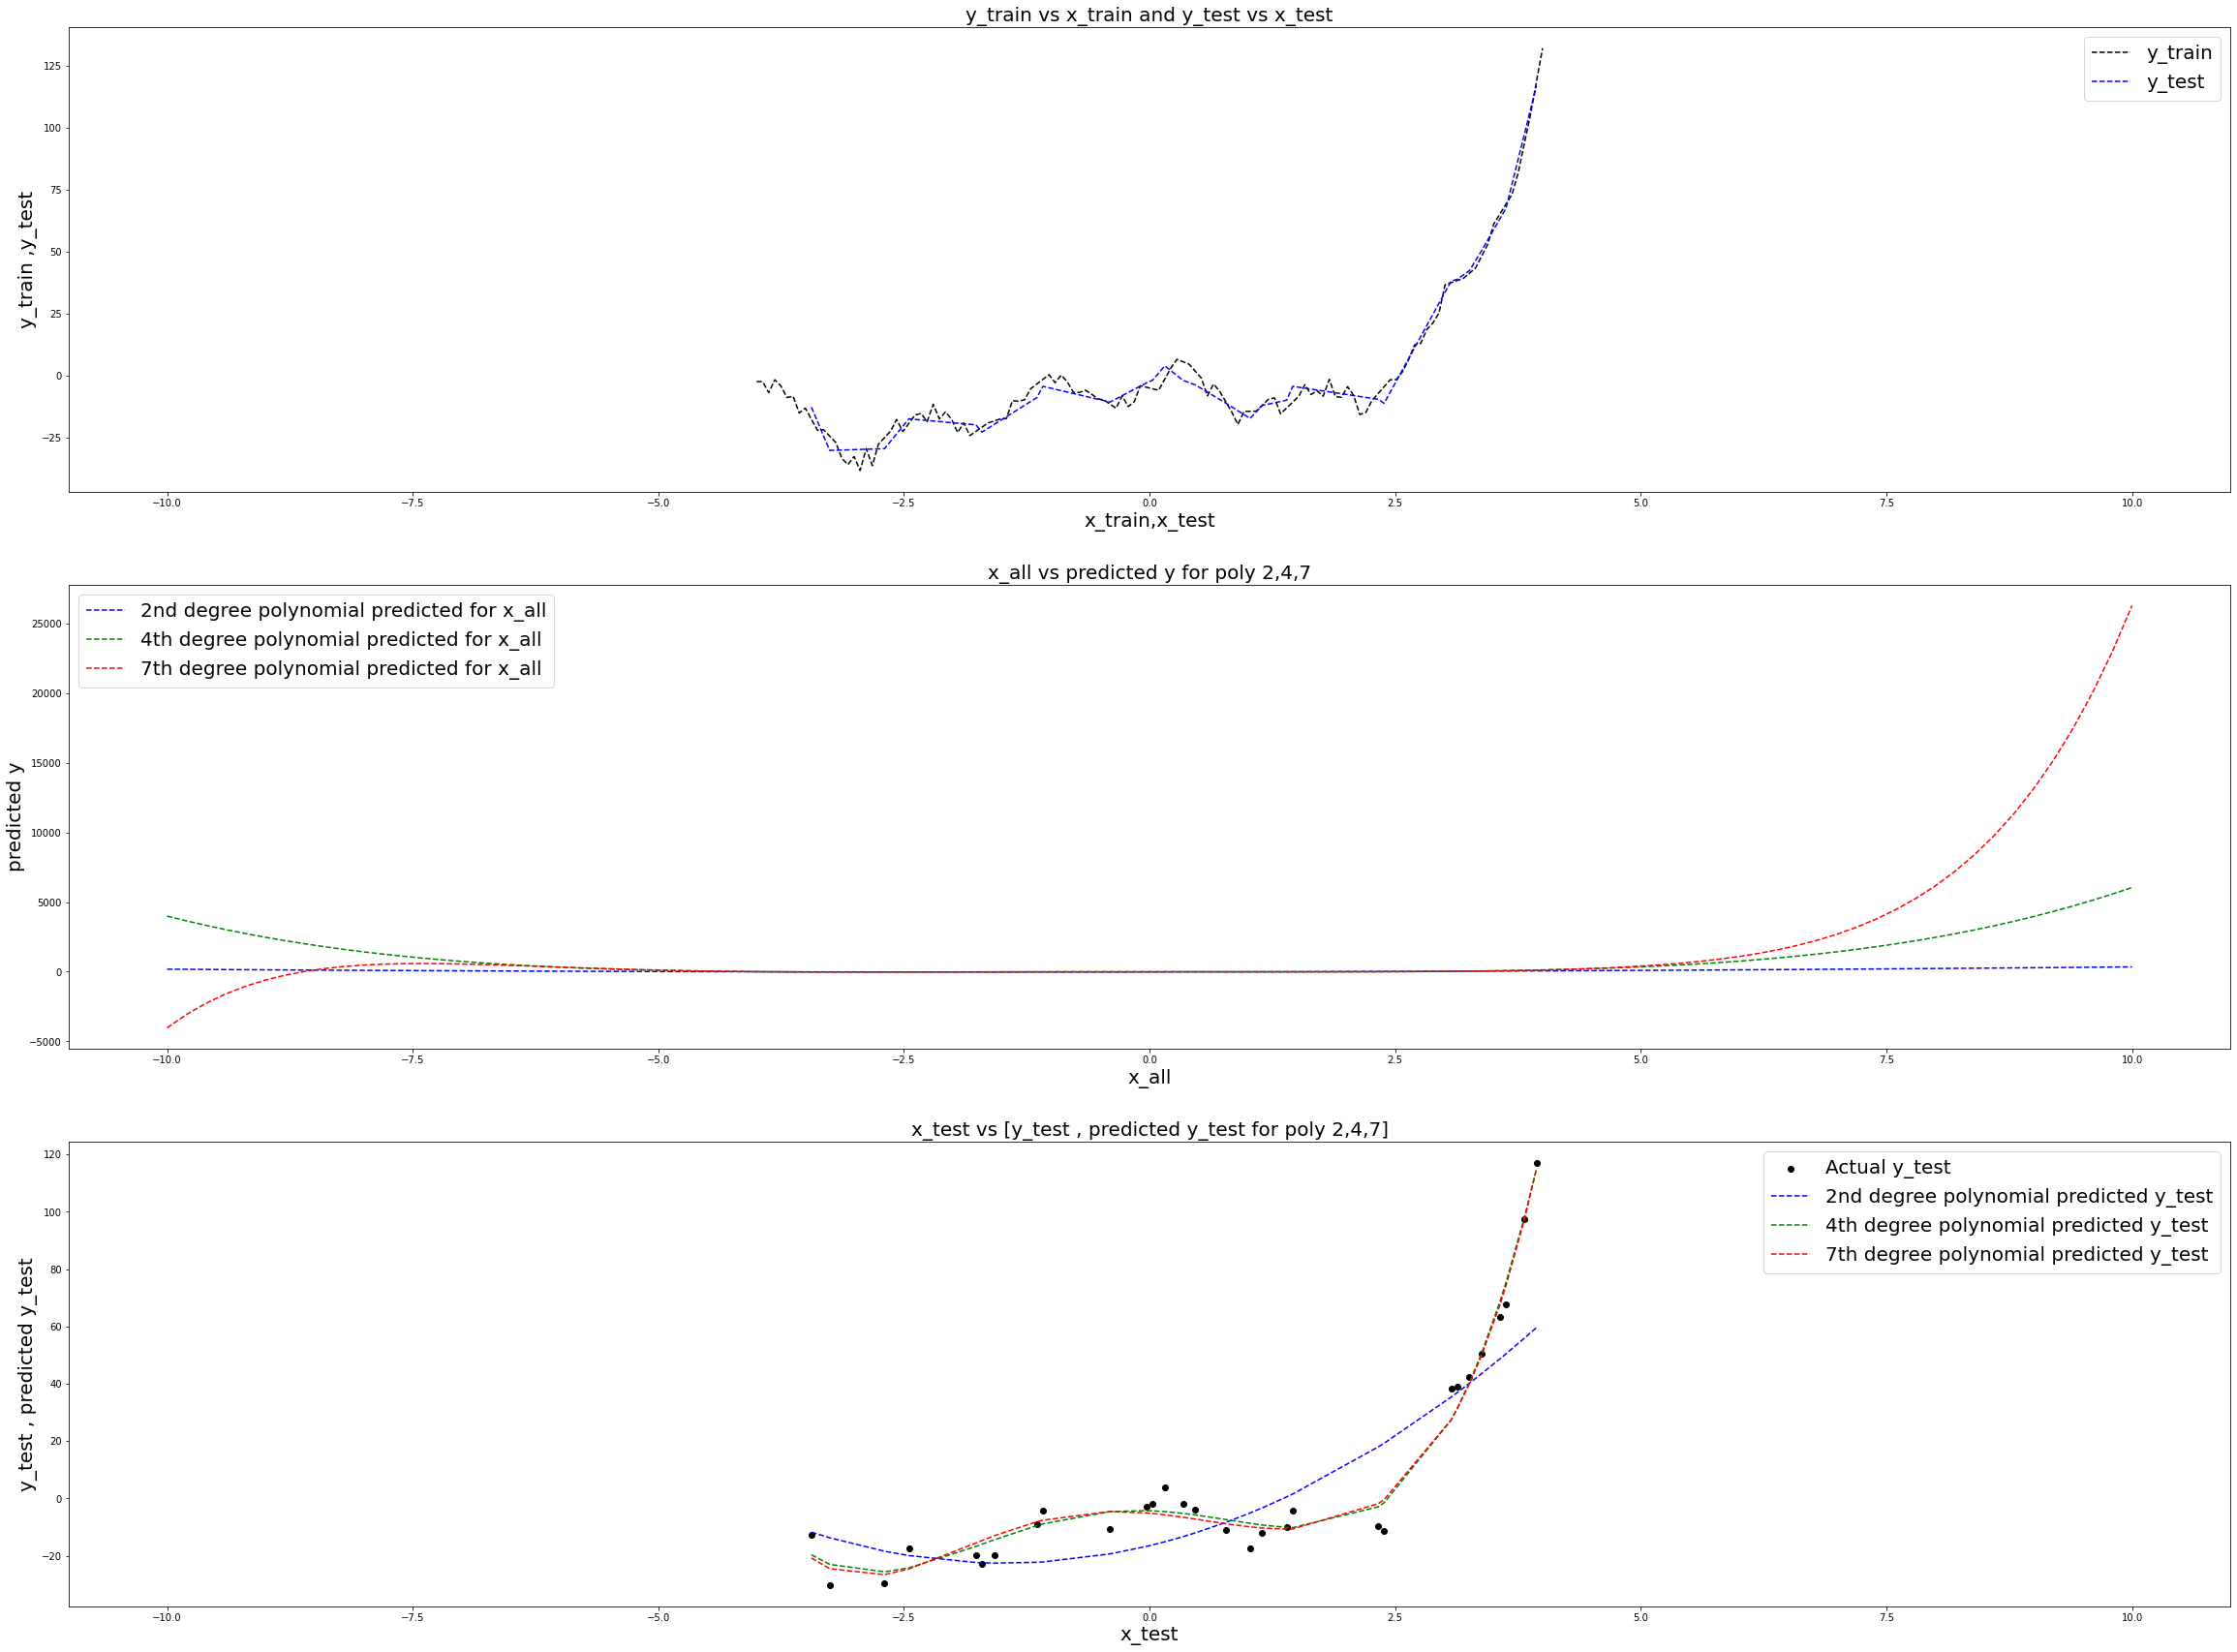

In [7]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

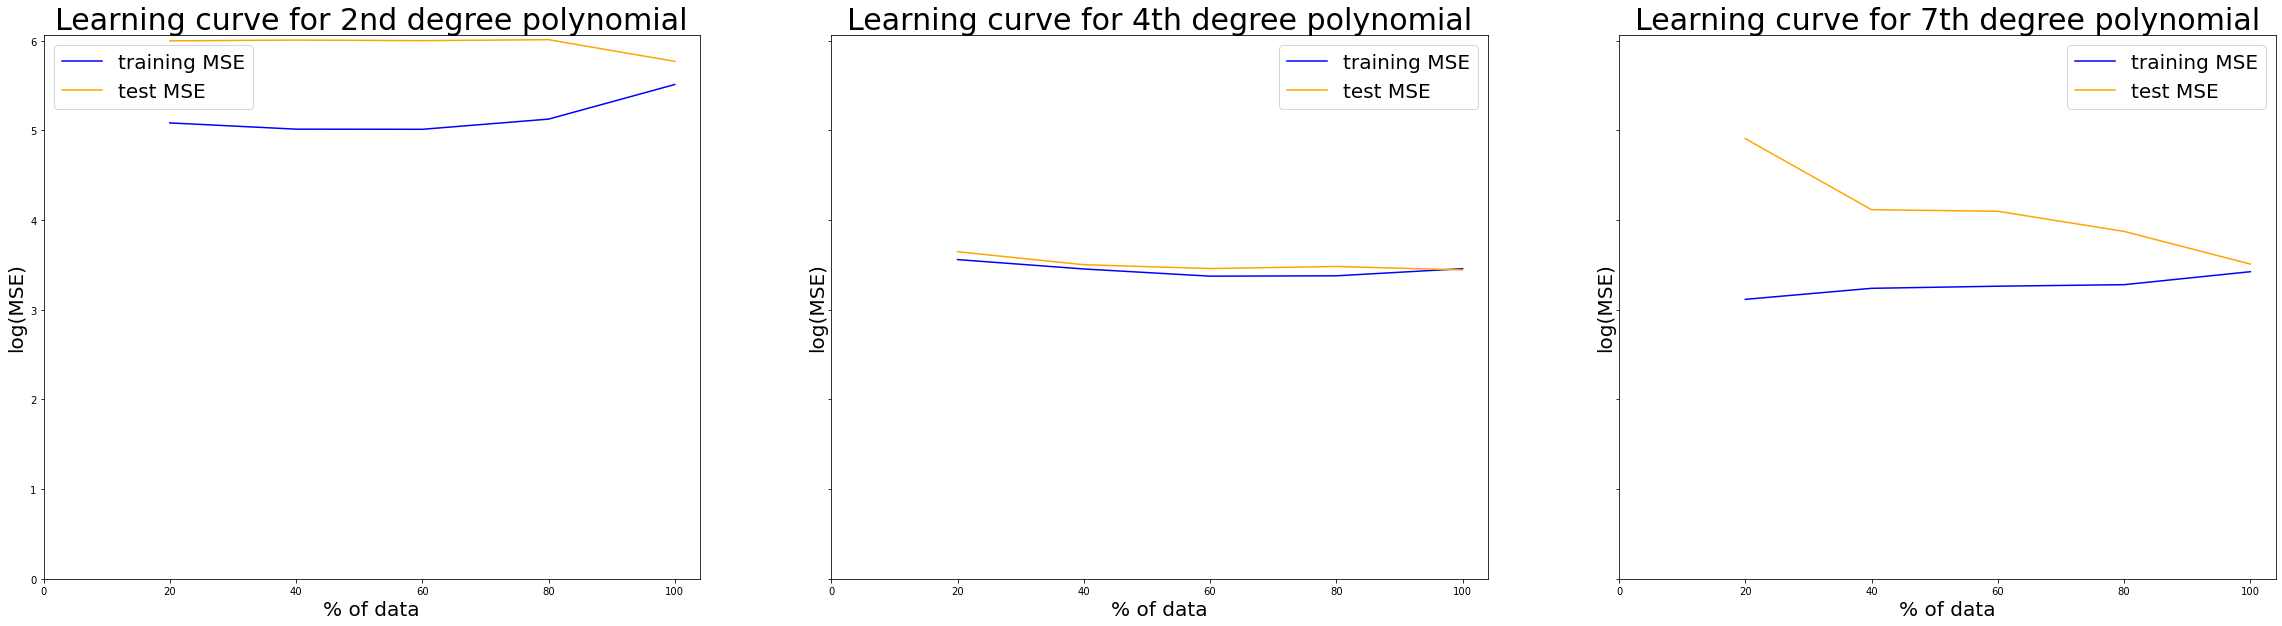

In [8]:
from math import log

ds = [20,40,60,80,100]

train_MSE_2 = []
train_MSE_4 = []
train_MSE_7 = []
test_MSE_2 = []
test_MSE_4 = []
test_MSE_7 = []

for datasize in ds:
    train_MSE_2.append(log(eval('train_rmses_%d'% (datasize))[0]))
    train_MSE_4.append(log(eval('train_rmses_%d'% (datasize))[1]))
    train_MSE_7.append(log(eval('train_rmses_%d'% (datasize))[2]))
    test_MSE_2.append(log(eval('test_rmses_%d'% (datasize))[0]))
    test_MSE_4.append(log(eval('test_rmses_%d'% (datasize))[1]))
    test_MSE_7.append(log(eval('test_rmses_%d'% (datasize))[2]))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,sharey = True,figsize=(40, 10))

ax1.plot(ds,train_MSE_2, label = 'Training MSE for poly 2', color = "blue")
ax1.plot(ds,test_MSE_2, label = 'Test MSE for poly 2', color = "orange")
ax1.set_ylabel("log(MSE)", fontsize = 20)
ax1.set_xlabel("% of data", fontsize = 20)
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)
ax1.legend(['training MSE','test MSE'], fontsize = 20)
ax1.set_title("Learning curve for 2nd degree polynomial", fontsize = 30)

ax2.plot(ds,train_MSE_4, label = 'Training MSE for poly 4', color = "blue")
ax2.plot(ds,test_MSE_4, label = 'Test MSE for poly 4', color = "orange")
ax2.set_ylabel("log(MSE)", fontsize = 20)
ax2.set_xlabel("% of data", fontsize = 20)
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0)
ax2.legend(['training MSE','test MSE'], fontsize = 20)
ax2.set_title("Learning curve for 4th degree polynomial", fontsize = 30)

ax3.plot(ds,train_MSE_7, label = 'Training MSE for poly 7', color = "blue")
ax3.plot(ds,test_MSE_7, label = 'Test MSE for poly 7', color = "orange")
ax3.set_ylabel("log(MSE)", fontsize = 20)
ax3.set_xlabel("% of data", fontsize = 20)
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0)
ax3.legend(['training MSE','test MSE'], fontsize = 20)
ax3.set_title("Learning curve for 7th degree polynomial", fontsize = 30)

plt.show()

From the above graphs, we can see that Learning curve for 4th degree polynomial starts converging form the beginning i.e. using 20% of training data set and consistent till the % of data used for training is 100%. The difference in the train and test MSEs of 4th degree polynomial model is also lesser compared to 2nd degree polynomial model and 7th degree polynomial model. This shows consistency of the model and can be stated as the best model amongst all three.

For 2nd degree polynomial, training MSE is high and test MSE is higher for all runs but only at 100% training data. This is because of high bias in the model. 

For 7th degree polynomial, we see that training MSE is lower but the test MSE is very high, this shows high variance in the model. It only converges for 100% of the training data.


# Question 3: Stochastic Gradient Descent Improvements (10 pts)

#### 1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 



Momentum in Gradient Descent improves the problem with the gradient descent algorithm that the search can bounce around the predictor space based on the gradient.
Momentum leads to a faster convergence of the loss function which we start from a random point in the predictor space by considering previously calculated gradients into weight updates. This way, the vertical oscillations in previous ones are dampened as they are in both positive and negative directions. 

Putting it in a formula:

change_x(t) = step_size * f'(x(t-1)) + beta * change_x(t-1)

And for weight updation:

x(t) = x(t-1) – change_x(t)

Where 't' is the current weight update calculation and t-1 corresponds to the previously calculated update.

Since all the previous ones are moving towards the local optima, we are left with a higher average in the horizontal direction and a dampended average across other directions based on both, the dampening hyperparameter and previous change in weight. The result is that we move faster toward convergence. 
A higher value for hyperparameter (beta -  range[0-1]) implies we are giving higher weightage to previous gradients. 

#### 2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


Mini-batch Gradient Descent can be seen as a midway approach between Batch Gradient Descent, where we send the entire dataset, and Stochastic Gradient Descent, where we send one data point at a time.

Mini-batch Gradient Descent overcomes the computational and memory usage disadvantages of Batch Gradient Descent by running propagation for samples of whole dataset. The model is updated frequently as compared to Batch gradient descent and the probabilty to find the closet global minima is also higher than that of Batch gradient descent. The memory usage is lowered as instead of sending and computing for the whole dataset, we are only sending samples of dataset.

Mini-batch Gradient Descent's oscillation is much lesser than Stochastic Gradient Descent and we will not get multiple minima points. The learning rate also will not be very extreme as compared to that of Stochastic Gradient Descent.



# Answer : 

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 

We will derive coefficients update for gradient descent and use it iteratively on single point to perform as SGD.

The following assumptions are made for derivation:

x : Matrix of size $n\times4$ with 4 columns $(1, e^{-x_1}, x_1, x_1x_2)$

w : $weight$ vector of size $4\times1$ - $(w_0, w_1, w_2, w_3)$

Estimator of size $n\times1 $: $$h_w(x) = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2$$
$$h_w(x) = x\times w$$

True values: vector $y$ of size $n\times1$

Loss function: $L = \frac{\sum(h_w(x) - y)^2}{2}$

Learning rate: $\eta$

Weight Updation: $$w^{new}= w^{current} - \eta\frac{\partial L}{\partial w}$$

$$\frac{\partial L}{\partial w} = \frac{2(h_w(x) - y)}{2}\frac{\partial (h_w(x) - y)}{\partial w}$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)\frac{\partial h_w(x)}{\partial w}$$

$$\frac{\partial h_w(x)}{\partial w} = \frac{\partial w_0 + w_1 e^{-x_1}+ w_2 x_1 + w_3 x_1x_2}{\partial w}$$

$$[\frac{\partial h_w(x)}{\partial w_0}, \frac{\partial h_w(x)}{\partial w_1}, \frac{\partial h_w(x)}{\partial w_2}, \frac{\partial h_w(x)}{\partial w_3}]  = [1, e^{-x_1}, x_1, x_1x_2]$$

$$\frac{\partial h_w(x)}{\partial w} = x$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)x$$

$$w^{new}= w^{current} - \eta\times(h_w(x) - y)'\times x$$

$$w^{new}= w^{current} - \eta\times(x*w - y)'\times x$$

When weight is updated iteratively using 1 data point at a time, Gradient Descent becomes SGD
<br>
<br>




2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [9]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from operator import itemgetter
warnings.filterwarnings("ignore")

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        summation=0
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                #compute error
                error = ((np.matmul(X[i],self.coef.T))-y[i])
                # Compute gradients
                tempcoef=self.coef.copy()
                #excluding the intercept term from regularization
                tempcoef[0]=0 
                gradient= error*X[i] + 2*(self.regularization)*tempcoef
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

            
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.show()

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = np.exp(-X[:,0])
        x[:,3] = X[:,0]*X[:,1]
        
        return x
        
    def linearPredict(self, X):
        return (np.dot(X,self.coef))

In [10]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

# Answer :

## QN2 Part A:

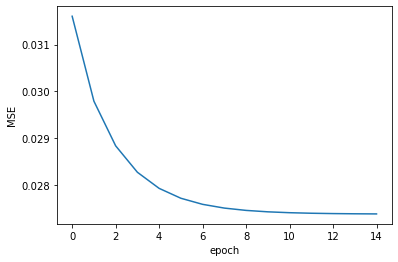

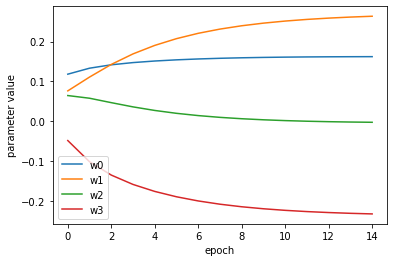

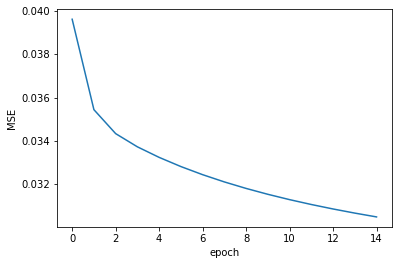

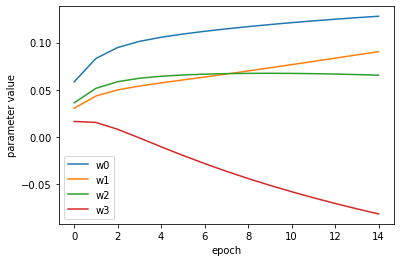

In [11]:
listofparameters=[]

for l in learning_rate:
    for r in regularization:
        reg = Regression(l,r,15)
        reg.fit(X,y,plot=False)
        listofparameters.append((l, r, reg.lowest_mse))

listofparameters.sort(key = itemgetter(2))
reg2 = Regression(listofparameters[0][0],listofparameters[0][1],15)
reg2.fit(X,y,plot=True)
reg3 = Regression(listofparameters[1][0],listofparameters[1][1],15)
reg3.fit(X,y,plot=True)

## QN2 Part B:

In [12]:
for i in [0, 1]:
    print("Number" , i+1, "Best Parameters: ")
    print("Lowest MSE score of",listofparameters[i][2],"for learning rate",listofparameters[i][0],"and regularization parameter =",listofparameters[0][1])


Number 1 Best Parameters: 
Lowest MSE score of 0.02739108757520101 for learning rate 0.01 and regularization parameter = 0
Number 2 Best Parameters: 
Lowest MSE score of 0.030495991520073516 for learning rate 0.001 and regularization parameter = 0
